# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import random, time, io
from itertools import product
from utils import get_dataset_files, extract_first_entries, extract_random_entries, extract_best_entries, render_single, render_multiple, complexity_score
from IPython.display import display, Image as IPImage
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from ipyplot import plot_images
from PIL import Image as pilimg

# Load data, generate complexity score

In [2]:
names = ['snowman', 'pig', 'car', 'fish', 'power outlet']
files = list(map(lambda n: f'./dataset/{n}.ndjson', names))

df = extract_first_entries(files, 50000)
print(f'Loaded {len(df)} entries from {files}')

df['complexity'] = df.apply(lambda row: complexity_score(row['drawing']), axis=1)

df


Loaded 250000 entries from ['./dataset/snowman.ndjson', './dataset/pig.ndjson', './dataset/car.ndjson', './dataset/fish.ndjson', './dataset/power outlet.ndjson']


,word,countrycode,timestamp,recognized,key_id,drawing,complexity
0,snowman,SG,2017-03-19 13:09:20.41026 UTC,True,5040959249186816,"[[[51, 37, 31, 33, 39, 56, 74, 88, 101, 106, 1...",39
1,snowman,GB,2017-04-01 00:23:56.92064 UTC,True,5057709479034880,"[[[128, 102, 73, 42, 36, 40, 55, 81, 112, 131,...",41
2,snowman,US,2017-01-28 22:52:14.74002 UTC,True,4649154502459392,"[[[95, 74, 56, 40, 36, 40, 53, 75, 89, 119, 13...",34
3,snowman,US,2017-03-02 19:02:04.75534 UTC,False,5668944822140928,"[[[17, 17], [36, 36]], [[14, 14, 26, 51, 58, 8...",55
4,snowman,US,2017-03-21 21:59:23.44407 UTC,True,5670608501211136,"[[[129, 116, 95, 79, 76, 79, 87, 111, 130, 139...",36
...,...,...,...,...,...,...,...
249995,power outlet,US,2017-03-26 16:46:22.04101 UTC,True,5349398601007104,"[[[36, 33, 27, 23, 19, 19, 12, 12, 17, 39, 113...",45
249996,power outlet,KW,2017-03-03 12:05:28.65947 UTC,False,4692501355036672,"[[[107, 98, 98, 104, 102, 106, 121], [29, 76, ...",76
249997,power outlet,US,2017-03-19 23:24:45.17094 UTC,True,5740946509529088,"[[[2, 2, 14, 20, 125, 147, 147, 27, 0], [253, ...",42
249998,power outlet,HU,2017-03-12 16:52:14.40216 UTC,True,5450473727328256,"[[[20, 9, 3, 0, 4, 81, 180, 184, 187, 187, 178...",35


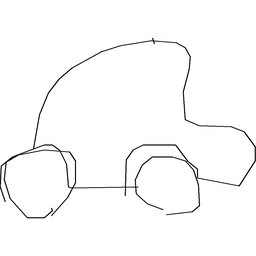

car


In [94]:
img = df.sample().iloc[0]
display(IPImage(render_single(img['drawing'])))
print(img['word'])

In [4]:
print(df['word'].value_counts())

snowman         50000
pig             50000
car             50000
fish            50000
power outlet    50000
Name: word, dtype: int64


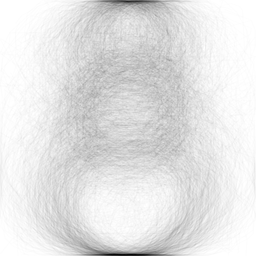

In [5]:
word = 'snowman'

imgs = df[df['word'] == 'snowman'].sample(1000)['drawing']
display(IPImage(render_multiple(imgs)))

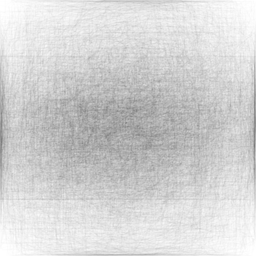

In [6]:
word = 'power outlet'

imgs = df[(df['word'] == word) & (df['recognized'] == False)].sample(1000)['drawing']
display(IPImage(render_multiple(imgs)))

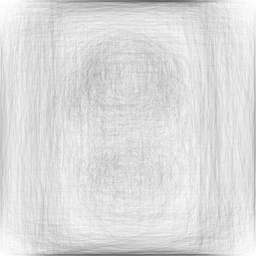

In [7]:
word = 'power outlet'

imgs = df[(df['word'] == word) & (df['recognized'] == True)].sample(1000)['drawing']
display(IPImage(render_multiple(imgs)))

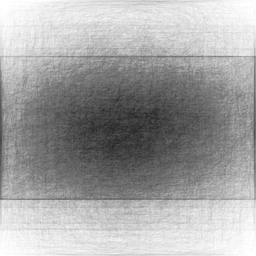

power outlet


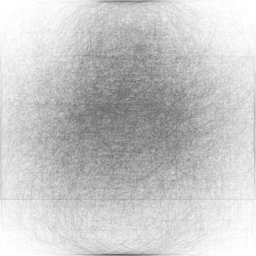

snowman


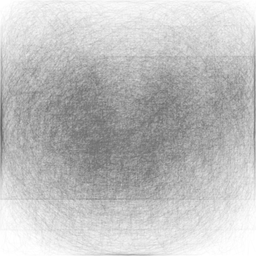

pig


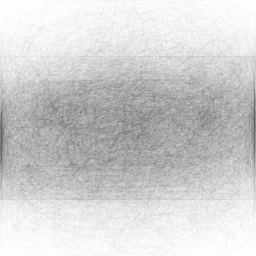

fish


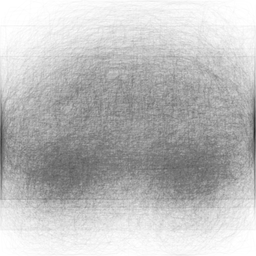

car


In [8]:
df2 = df.sort_values(by=['complexity'], ascending=False)

for word in set(df2['word'].values):
    imgs = df2[(df2['word'] == word)][:1000]['drawing']
    display(IPImage(render_multiple(imgs)))
    print(word)

/home/chris/.local/lib/python3.9/site-packages/numpy/core/_asarray.py:102: FutureWarning: The input object of type 'PngImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PngImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return array(a, dtype, copy=False, order=order)



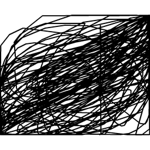
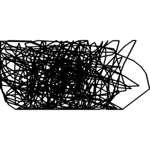
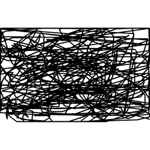
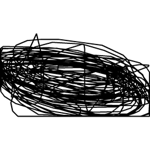
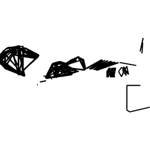
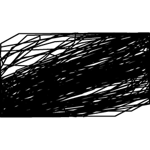
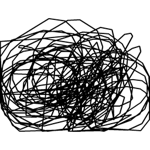
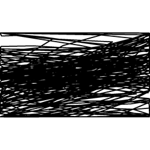
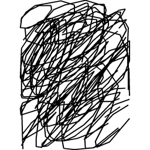
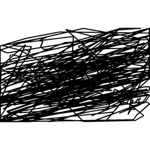
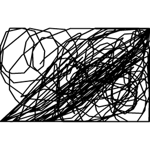
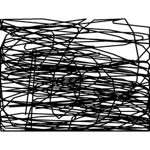
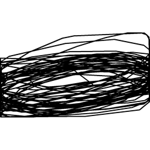
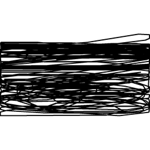
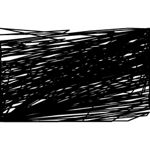
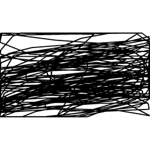
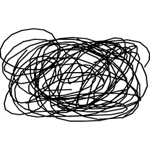
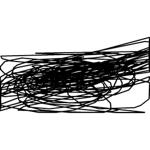
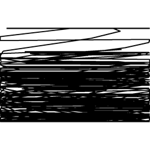
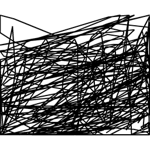
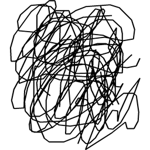
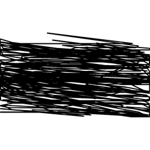
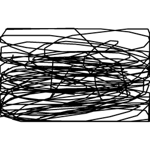
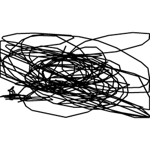
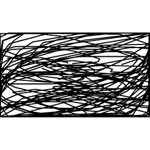
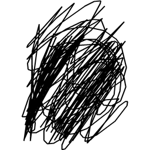
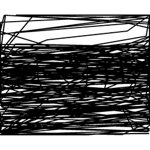
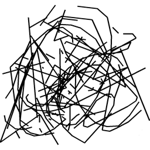
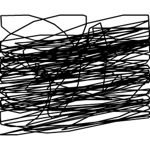
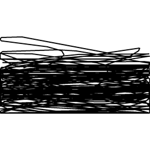


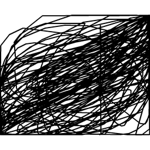
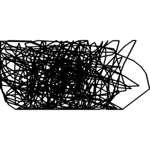
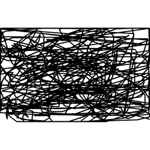
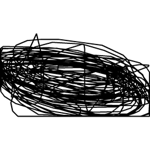
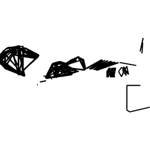
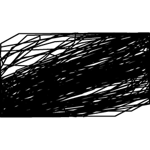
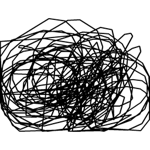
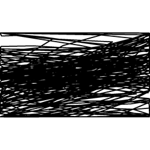
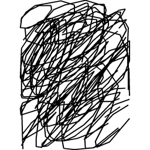
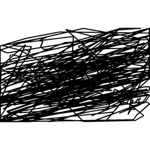
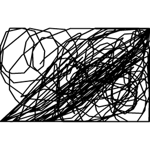
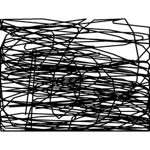
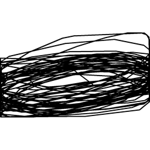
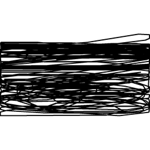
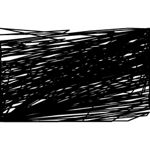
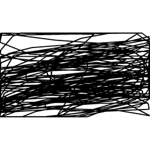
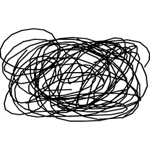
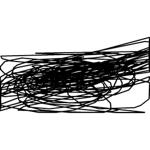
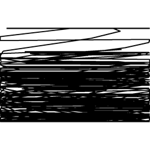
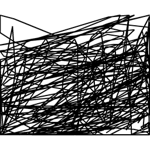
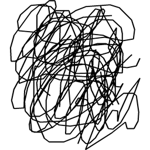
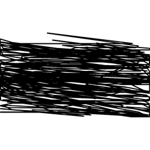
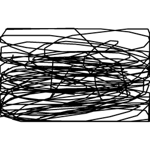
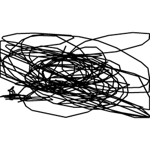
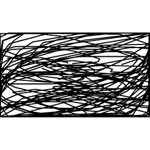
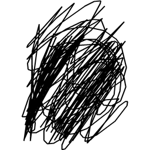
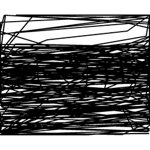
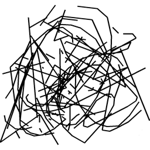
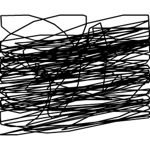
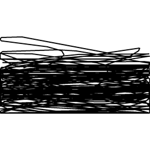

In [9]:
word = 'power outlet'
images = []
for i in range(300):
    images.append(pilimg.open(io.BytesIO(render_single(df2[df2['word'] == word]['drawing'].iloc[i], stroke_width_scale=2))))

plot_images(images)

count    250000.000000
mean         50.728364
std          22.461515
min           2.000000
25%          36.000000
50%          47.000000
75%          60.000000
max         916.000000
Name: complexity, dtype: float64

array([[<AxesSubplot:title={'center':'complexity'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'complexity'}>]], dtype=object)

array([[<AxesSubplot:title={'center':'complexity'}>]], dtype=object)

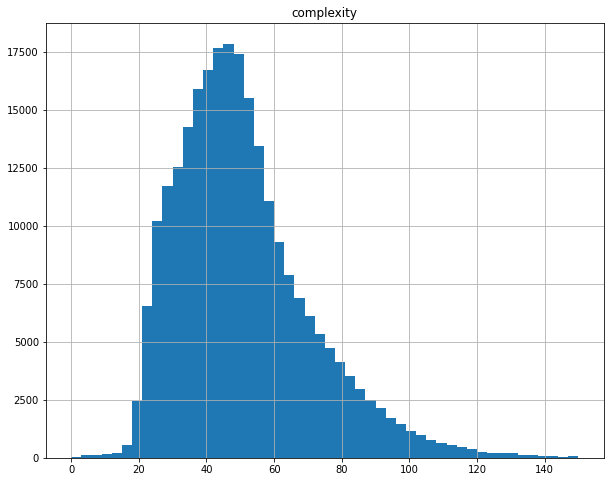

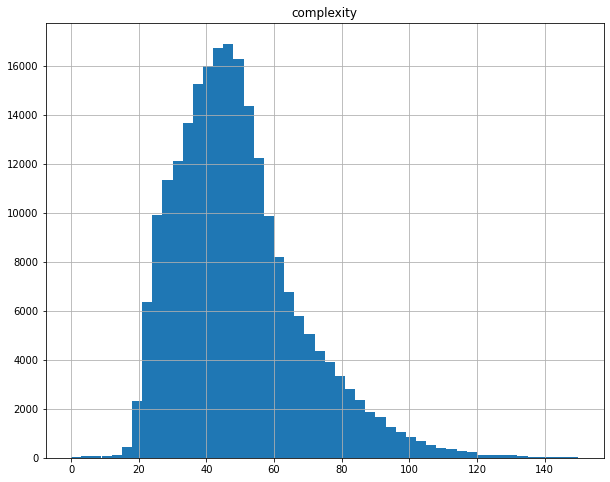

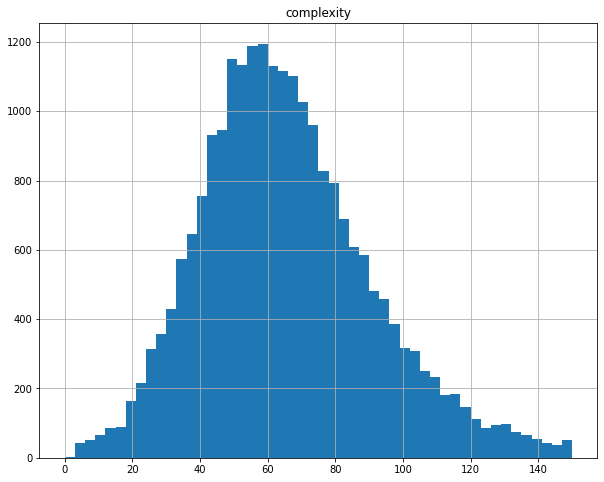

In [97]:
df2['complexity'].describe()
display(df2.hist(column='complexity', bins=50, range=[0, 150], figsize=(10, 8)))
display(df2[df2['recognized'] == True].hist(column='complexity', bins=50, range=[0, 150], figsize=(10, 8)))
display(df2[df2['recognized'] == False].hist(column='complexity', bins=50, range=[0, 150], figsize=(10, 8)))

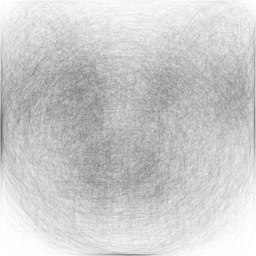

pig, recognized


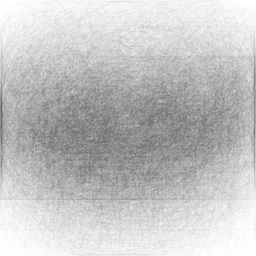

pig, not recognized


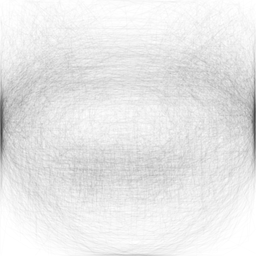

pig, recognized


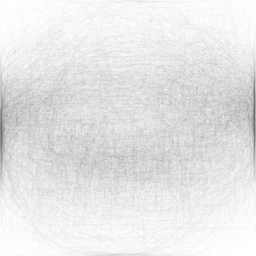

pig, not recognized


In [11]:
word = random.choice(list(set(df2['word'].values)))
slices = [slice(None, 1000), slice(-1000, None)]
for n in product(slices, [True, False]):
    imgs = df2[(df2['word'] == word) & (df2['recognized'] == n[1])][n[0]]['drawing']
    display(IPImage(render_multiple(imgs)))
    print(word + (", recognized" if n[1] else ", not recognized"))